# Pymaceuticals Inc.
---

### Analysis
- Ramicane and Capomulin seem to be effective at treating squamous cell carcinoma as mice treated with these regimens show lower mean and median tumor volumes than the initial volume of 45 mm3. For all other drugs, mean and median tumor size was above 45. This suggests that only Ramicane and Capomulin are capable of reducing tumor size.
- Ramicane and Capomulin also had the lowest values for variance, standard deviation and standard error suggesting higher consistency and precision of the results compared to other drugs. This reduced variability may be influenced by the greater number of timepoints for Ramicane and Capomulin compared with other drugs, possibility minimising the effects of fluctuations.
- The plot of tumor volume over time for mouse s710 showed great fluctuations in tumor volume but a general decrease over the course of the study. This supports the conclusion that Capomulin seems to be effective a reducing tumor volume.
- Though Capomulin shows promising results for SCC treatment, Ramicane seems to be slightly more effective in this trial as it has the lowest values of all for mean and median tumor volumes as well as the least variability in data.
- There is a strong positive correlation between the weight of a mouse and average tumor volume suggested by the Pearson r value of 0.84 for Capomulin treatment.
- There is scope for further research - the effects of mouse age and metastatic site on the results could be explored.
 

In [127]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Files to load
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Reading the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combining the data into a single DataFrame
combined_results = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Displaying the data table for preview
combined_df = pd.DataFrame(combined_results)
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [128]:
# Checking the number of mice.
mice_count = len(combined_df["Mouse ID"].unique())
mice_count

249

In [129]:
# Retreiving dupliacate data for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"], keep = False)]
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [130]:
# Displaying duplicates 
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [131]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(["Mouse ID", "Timepoint"])
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [132]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_df["Mouse ID"].unique())
clean_mice_count

249

## Summary Statistics

In [133]:
# Generating a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_regimen = clean_df.groupby("Drug Regimen")
mean_tumor_vol = drug_regimen["Tumor Volume (mm3)"].mean()
median_tumor_vol = drug_regimen["Tumor Volume (mm3)"].median()
variance_tumor_vol = drug_regimen["Tumor Volume (mm3)"].var()
stdev_tumor_vol = drug_regimen["Tumor Volume (mm3)"].std()
sem_tumor_vol = drug_regimen["Tumor Volume (mm3)"].sem()

summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_vol,
    "Median Tumor Volume": median_tumor_vol,
    "Tumor Volume Variance": variance_tumor_vol,
    "Tumor Volume Std. Dev.": stdev_tumor_vol,
    "Tumor Volume Std. Err.": sem_tumor_vol,
})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [134]:
# Calculating the above summary statistics using the aggregation method

agg_summary_statistics = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
agg_summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

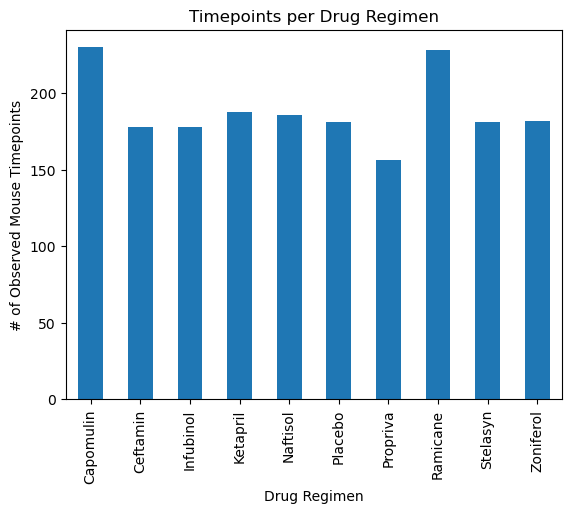

In [135]:
# Generating a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints = clean_df.groupby("Drug Regimen")["Timepoint"].count()
timepoints.plot(kind = "bar", ylabel = "# of Observed Mouse Timepoints", title = "Timepoints per Drug Regimen")
plt.show()

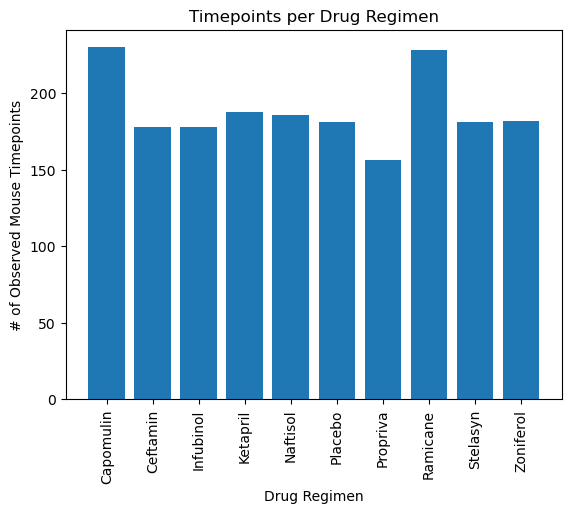

In [137]:
# Generating a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_vals = np.arange(len(timepoints))
y_vals = timepoints
plt.bar(x_vals, y_vals)
plt.xticks(x_vals, timepoints.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Timepoints per Drug Regimen")
plt.show()

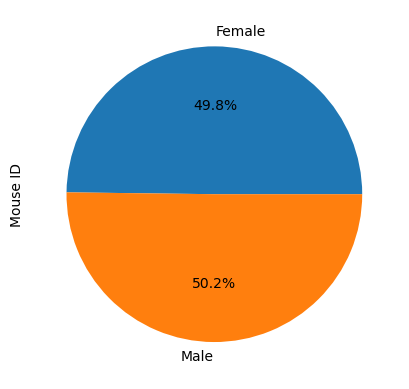

In [138]:
# Generating a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = clean_df.groupby("Sex")["Mouse ID"].nunique()
sex_distribution.plot(kind = "pie", labels = sex_distribution.index, autopct="%1.1f%%")
plt.show()

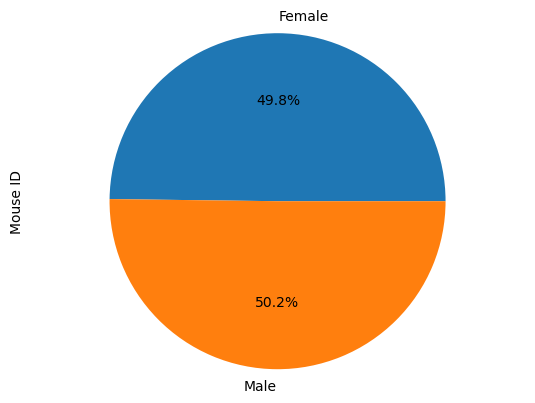

In [139]:
# Generating a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_distribution, labels = sex_distribution.index, autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel("Mouse ID")
plt.show()

## Quartiles, Outliers and Boxplots

In [140]:
# Calculating the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Retreiving the last (greatest) timepoint for each mouse
last_timepoints = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Merging this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoints, clean_df, how = "left", on = ["Mouse ID", "Timepoint"])
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [142]:
# Putting treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Creating empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Looping through treatments and appending tumor volume to list

for treatment in treatments:
    tumor_volume = merged_df.loc[merged_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_volume_data.append(tumor_volume)
 
    # Calculating quartiles and interquartile range for each treatment
for i, treatment in enumerate(treatments):
    quartiles = tumor_volume_data[i].quantile([0.25, 0.5, 0.75])
    IQR = quartiles[0.75] - quartiles[0.25]
    
    # Calculating upper and lower bounds
    lower_bound = quartiles[0.25] - 1.5 * IQR
    upper_bound = quartiles[0.75] + 1.5 * IQR
    
    # Determining outliers using upper and lower bounds
    potential_outliers = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]
    print(f"{treatment}'s potential outliers: {potential_outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/m5/fv2mqn8572d_770htcjk9q8m0000gn/T/ipykernel_10824/947726588.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


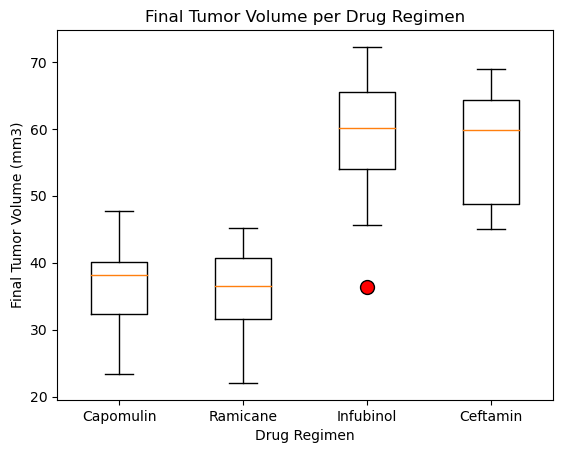

In [143]:
# Generating a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_xticklabels(treatments)
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_title("Final Tumor Volume per Drug Regimen")
ax1.boxplot(tumor_volume_data, flierprops = {"marker": "o", "markerfacecolor": "red", "markersize": 10})
plt.show()

## Line and Scatter Plots

In [100]:
# Retreiving all data for Capomulin regimen
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [144]:
# Retreiving all data for mouse s710
capomulin_s710 = capomulin_df.loc[capomulin_df["Mouse ID"] == "s710", :]
capomulin_s710

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
232,s710,0,45.000000,0,Capomulin,Female,1,23
300,s710,5,43.180977,0,Capomulin,Female,1,23
534,s710,10,43.688026,0,Capomulin,Female,1,23
874,s710,15,41.845235,0,Capomulin,Female,1,23
1105,s710,20,42.629963,1,Capomulin,Female,1,23
1129,s710,25,43.060409,1,Capomulin,Female,1,23
1448,s710,30,43.571703,1,Capomulin,Female,1,23
1607,s710,35,44.160519,1,Capomulin,Female,1,23
1666,s710,40,40.171920,1,Capomulin,Female,1,23
1854,s710,45,40.728578,1,Capomulin,Female,1,23


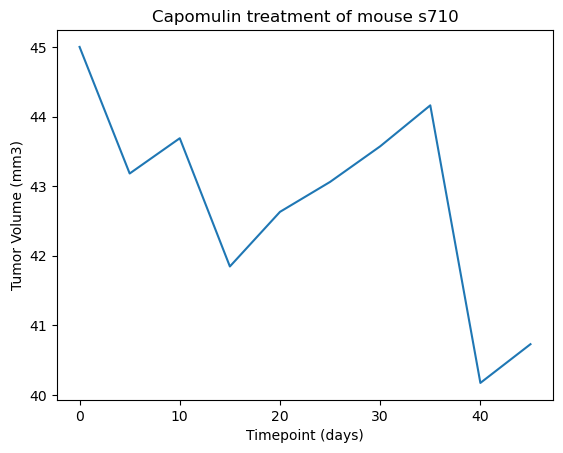

In [145]:
# Generating a line plot of tumor volume vs. time point for mouse s710
plt.plot(capomulin_s710["Timepoint"], capomulin_s710["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse s710")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

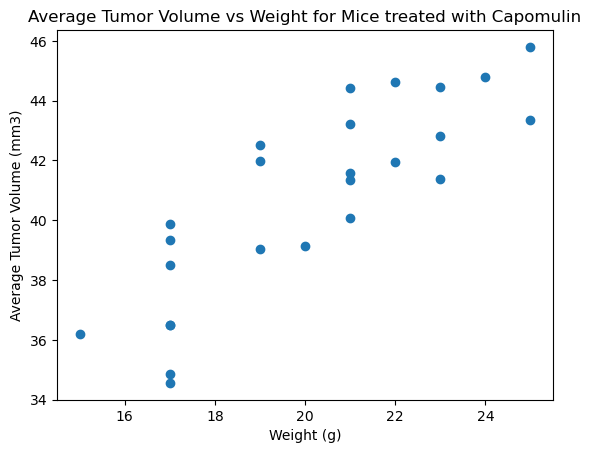

In [146]:
# Generating a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_vol = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].first()
plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Weight for Mice treated with Capomulin")
plt.show()

## Correlation and Regression

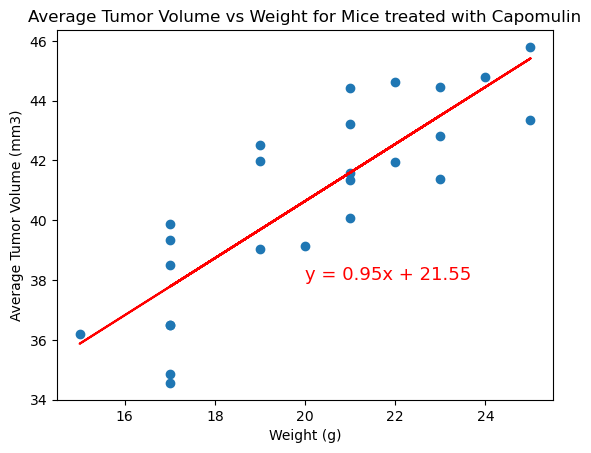

The correlation coefficient between mouse weight and the average tumor volume is 0.84


In [147]:
# Calculating the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = weight
y_values = avg_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Weight for Mice treated with Capomulin")
plt.annotate(line_eq,(20,38),fontsize=13,color="red")
plt.show()

print(f"The correlation coefficient between mouse weight and the average tumor volume is {round(st.pearsonr(weight,avg_tumor_vol)[0],2)}")